In [37]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
mipath = "australian.dat"
data = pd.read_csv(mipath, sep=" ", header=None)
data.columns = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "class"]
data.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  class   690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [40]:
X = data.iloc[:,:-1]
y = data[["class"]]

In [41]:
#Ver si esta balanceado el conjunto de datos
print("Total de datos: ", y.shape[0])
print("Total de datos de la clase positiva", sum(y["class"]))
print("Porcentraje de datos de la clase positiva (1): %.1f%% " %(100*sum(y["class"])/y.shape[0]) )
print("Porcentraje de datos de la clase positiva (1): %.1f%% " %(100*(1-sum(y["class"])/y.shape[0])) )

Total de datos:  690
Total de datos de la clase positiva 307
Porcentraje de datos de la clase positiva (1): 44.5% 
Porcentraje de datos de la clase positiva (1): 55.5% 


In [42]:
#Particiones o separar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=45)

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(414, 14)
(414, 1)
(276, 14)
(276, 1)


DECISION TREE BASICO

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
modelo_dt = DecisionTreeClassifier()
modelo_dt.fit(X_train, y_train)
modelo_dt.score(X_test, y_test)

0.8297101449275363

Vamos a modificar los hiperparametros.
criterion: mide la calidad de la division de cada nodo.
max_depth: maxima profundidad de expansion del arbol.
min_samples_split: minimo de datos en un nodo antes de hacer la division.

In [46]:
modelo_dt = DecisionTreeClassifier(criterion="entropy", max_depth=15, min_samples_split=8)
modelo_dt.fit(X_train, y_train)
modelo_dt.score(X_test, y_test)

0.8659420289855072

Arbol de Decision con parametros por default
Promedio y desviacion estandar: 82.5% (0.8)


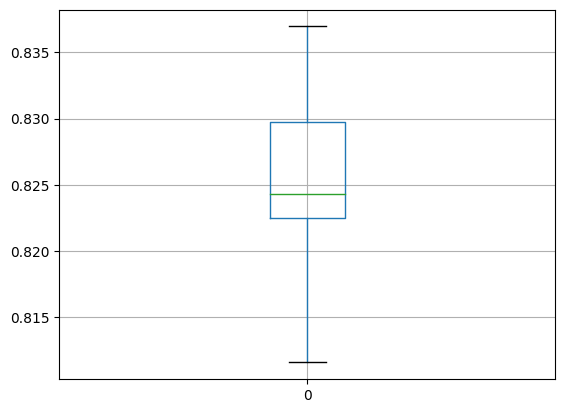

In [47]:
n_for = 10
accAD =  list() #Definimos la variable que guardara los resultados obtenidos

for k in range(n_for):
    modelo_AD = DecisionTreeClassifier() #Inicializando el modelo por default

    modelo_AD.fit(X_train, y_train) #Entrenando el modelo
    tmp = modelo_AD.score(X_test, y_test) #Validando el modelo
    accAD.append(tmp)

print('Arbol de Decision con parametros por default\nPromedio y desviacion estandar: %.1f%% (%.1f)'% (100*np.mean(accAD),100*np.std(accAD)))
pd.DataFrame(accAD).boxplot()
plt.show()

In [48]:
accAD

[0.8297101449275363,
 0.8369565217391305,
 0.8115942028985508,
 0.822463768115942,
 0.822463768115942,
 0.8297101449275363,
 0.8333333333333334,
 0.822463768115942,
 0.8260869565217391,
 0.8115942028985508]

In [ ]:

accAD2 =  list() #Definimos la variable que guardara los resultados obtenidos

for k in range(n_for):
    modelo_AD = DecisionTreeClassifier(criterion="entropy",
                                        max_depth=10,
                                        min_samples_split=0.1,
                                        min_samples_leaf=0.01) 
    modelo_AD.fit(X_train, y_train) #Entrenando el modelo
    tmp = modelo_AD.score(X_test, y_test) #Validando el modelo
    accAD2.append(tmp)

print('Arbol de Decision con parametros por default\nPromedio y desviacion estandar: %.1f%% (%.1f)'% (100*np.mean(accAD2),100*np.std(accAD2)))
pd.DataFrame(accAD2).boxplot()
plt.show()

In [52]:
ddff = pd.DataFrame(list(zip(accAD,accAD2)), columns=["default", "ajustado"])
ddff

,default,ajustado
0,0.829710,0.865942
1,0.836957,0.865942
2,0.811594,0.865942
3,0.822464,0.865942
4,0.822464,0.865942
5,0.829710,0.865942
6,0.833333,0.865942
7,0.822464,0.865942
8,0.826087,0.865942
9,0.811594,0.865942


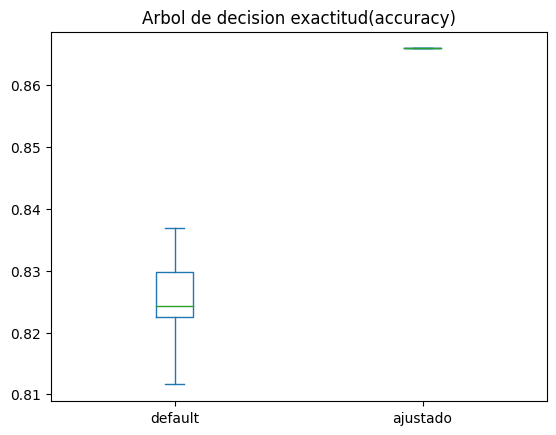

In [53]:
#Dibujamos los boxplot del dataframe
ddff.plot(kind='box')
plt.title('Arbol de decision exactitud(accuracy)')
plt.show()